Jupyter notebook for assignment 1 in multivariate data modelling. Not my best work


In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



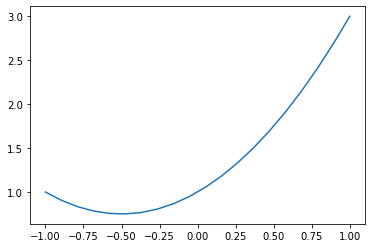

In [7]:
theta_0 = 1
theta_1 = 1
theta_2 = 1
alpha = 0.4
var = 1
beta = 2

def y_elem(i):
    temp = theta_0 + theta_1*u[i] + theta_2*u[i]*u[i]   
    return temp
u = np.linspace(-1,1,20)
y_true = np.empty(len(u))
for i in range(len(u)):
    y_true[i] = y_elem(i);
plt.plot(u,y_true)


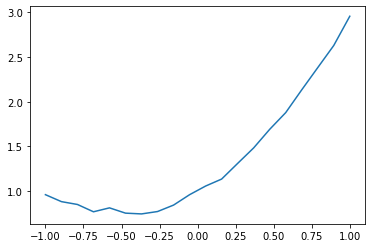

In [8]:

def get_noise():
    scale = 0.03
    noise = np.zeros(len(u))
    gauss = np.random.binomial(1,1-alpha)
    for i in range(len(u)):
        if not gauss:
            noise[i] = scale *np.random.normal(0,var,1)
        else:
            noise[i] = scale *np.random.laplace(0,beta,1)
    return noise
y = y_true + get_noise()
plt.plot(u,y)


    

Now we aquire the estime theta hat:

In [9]:
#theta_hat = np.linalg.inv(u_reshaped * u) * (u.T * y)
N = 20
u_tensor_0 = np.reshape(u,(N,1))
#print(u_reshaped)
#theta_hat = np.linalg.inv(u_reshaped @ u) @ (u_reshaped @ y)
#print(y)
ones_vec = np.ones((N,1))
u_tensor = np.append(ones_vec, u_tensor_0, axis=1)

for i in range(2,3):
    u_tensor = np.append(u_tensor, np.power(u_tensor_0, i) ,axis=1)



u_transpose_dot_u = np.dot(u_tensor.T,u_tensor)  # calculating dot product
u_transpose_dot_u_inv = np.linalg.inv(u_transpose_dot_u) #calculating inverse

In [10]:
u_transpose_dot_y = np.dot(u_tensor.T,y)  # calculating dot product
print(u_transpose_dot_y)

[26.99879145  7.22761656 12.05139121]


LS parameters:         ['0.99', '0.98', '0.98']
True model parameters: [1, 1, 1]


TypeError: 'numpy.ndarray' object is not callable

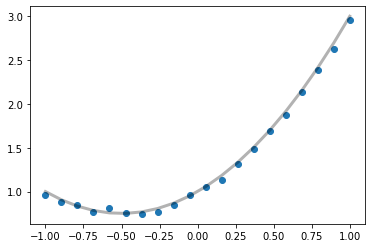

In [11]:
true_params = [theta_0, theta_1, theta_2]

LS_params = np.dot(u_transpose_dot_u_inv,u_transpose_dot_y)
LS_params_rounded = ["{:.2f}".format(round(i, 2)) for i in LS_params.tolist()]
print(f"LS parameters:         {LS_params_rounded}")
print(f"True model parameters: {true_params}")

# Recreate model based on LS estimate:
LS_params = LS_params.tolist()
#LS_estimate = arbitrary_poly(LS_params)

def y_elem_estimate(i,theta_0,theta_1,theta_2):
    temp = theta_0 + theta_1*u[i] + theta_2*u[i]*u[i]   
    return temp
LS_estimate = np.zeros(20)
for i in range(20):
    LS_estimate[i] = y_elem_estimate(i, LS_params[0], LS_params[1], LS_params[2])

# Plot true vs. estimated model
plt.scatter(u, y, label=r"Measured data $\mathcal{N}(\mu, \sigma)$")
u0 = np.linspace(0, max(u), N)
plt.plot(u, y_true, "k", alpha=0.3, lw=3, label="True model")
plt.plot(u0, LS_estimate(u0), "r--",  lw=3, label="LS estimate")
#plt.xlim(0, 10)
plt.legend()
plt.xlabel("x")
plt.ylabel("y");

In [12]:
np.linalg.norm(LS_estimate - y_true)

0.10356755100288813